# IntroStat Week 5

Welcome to the 5th lecture in IntroStat

During the lectures we will present both slides and notebooks. 

This is the notebook used in the lecture in week 5.


In [354]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

### Simulation: Sample from normal distribution

In [355]:
np.random.seed(24)

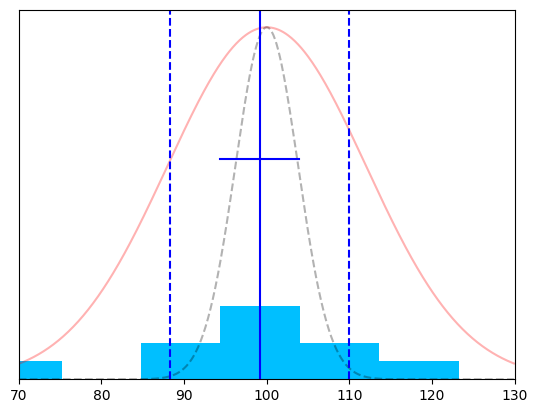

In [374]:
# (repeat this cell many times)
mu = 100
sigma = 12
n = 10
data = stats.norm.rvs(mu, sigma, size=n)
x = np.arange(70,130,0.1)
plt.xlim(70,130)
plt.plot(x, .2*np.sqrt(2*np.pi*sigma**2)*stats.norm.pdf(x, loc=mu, scale=sigma), color="red",alpha=0.3)
plt.plot(x, .2*np.sqrt(2*np.pi*sigma**2/n)*stats.norm.pdf(x, loc=mu, scale=sigma/np.sqrt(n)), color="black", linestyle='--',alpha=0.3)
plt.hist(data, density=True, color='deepskyblue', bins=6)
plt.axvline(data.mean(), linestyle='-', color="blue", ymin=0, ymax=1)
plt.plot([data.mean()-data.std(ddof=1)/np.sqrt(n), data.mean()+data.std(ddof=1)/np.sqrt(n)], [0.25/2,0.25/2], linestyle='-', color="blue")
plt.axvline(stats.t.ppf(0.025, df=n-1)*data.std(ddof=1)/np.sqrt(n)+data.mean(), linestyle='--', color="blue", ymin=0, ymax=1)
plt.axvline(stats.t.ppf(0.975, df=n-1)*data.std(ddof=1)/np.sqrt(n)+data.mean(), linestyle='--', color="blue", ymin=0, ymax=1)
plt.tick_params(left = False, right = False , labelleft = False) 
plt.show()

### Simulation: ECDF and Q-Q plot

In [375]:
np.random.seed(24)

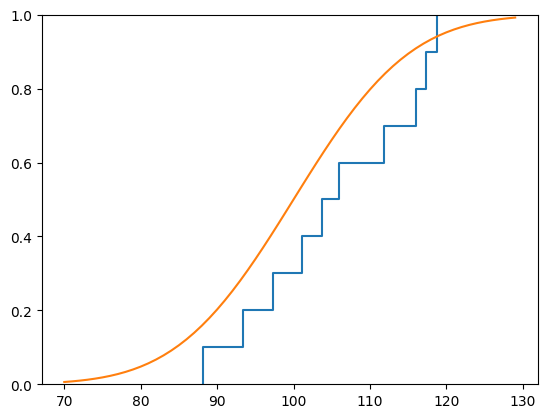

In [401]:
# (repeat this cell many times)
data = stats.norm.rvs(mu, sigma, size=n)
plt.ecdf(data)
plt.plot(np.arange(70,130,1), stats.norm.cdf(np.arange(70,130,1), loc=mu, scale=sigma))
plt.show()

In [402]:
np.random.seed(24)

In [403]:
# import statsmodels.api to do automated q-q-plot
import statsmodels.api as sm

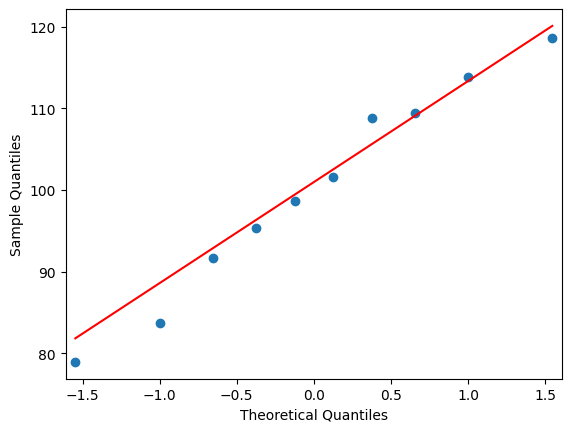

In [444]:
# (repeat this cell many times)
data = stats.norm.rvs(mu, sigma, size=n)
sm.qqplot(data,line="q",a=3/8) 
# OBS: "a = 3/8" is preferred for n <= 10 
#     ("a = 1/2" is preferred for n >  10)  
plt.show()

Now try larger samples:

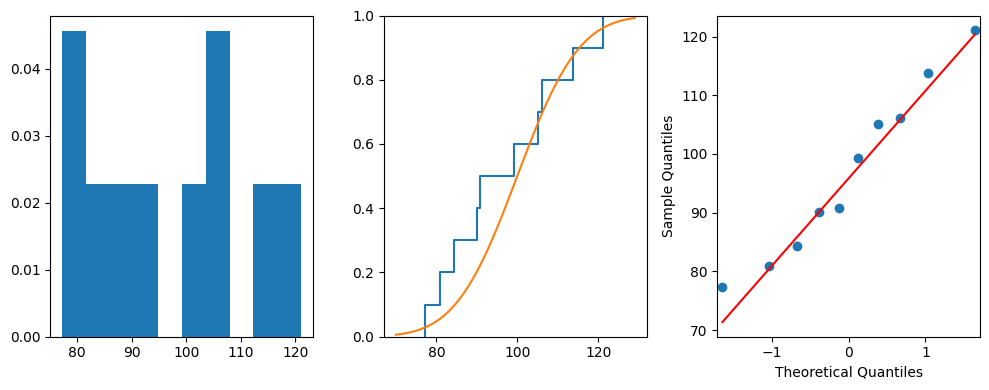

In [585]:
# (repeat this cell many times - then increase n and repeat again)
n=10 # also try n = 100
data = stats.norm.rvs(mu, sigma, size=n)
fig, axs = plt.subplots(1, 3, figsize=(10,4))
axs[0].hist(data, density=True)
axs[1].ecdf(data)
axs[1].plot(np.arange(70,130,1), stats.norm.cdf(np.arange(70,130,1), loc=mu, scale=sigma))
sm.qqplot(data,line="q",a=1/2,ax=axs[2])

plt.tight_layout()
plt.show()

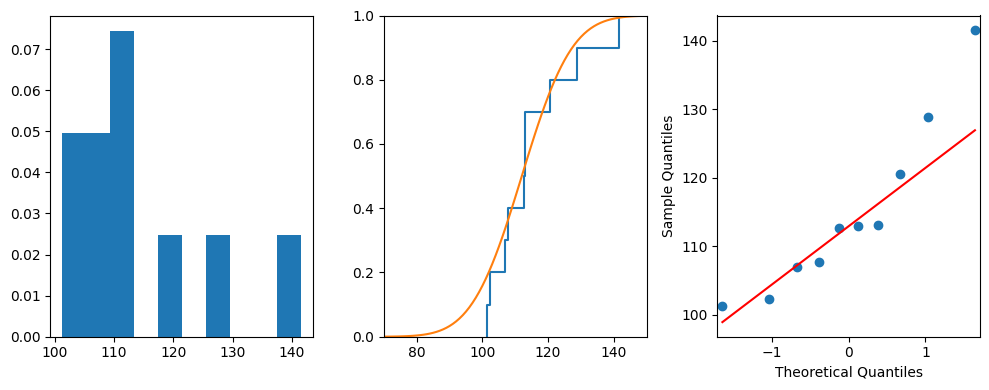

In [565]:
# examples with exponentially distributed data:

n=10 # also try n = 100
data = stats.expon.rvs(mu, sigma, size=n)
fig, axs = plt.subplots(1, 3, figsize=(10,4))
axs[0].hist(data, density=True)
axs[1].ecdf(data)
axs[1].plot(np.arange(70,150,1), stats.norm.cdf(np.arange(70,150,1), loc=stats.expon.mean(loc=mu, scale=sigma), scale=stats.expon.std(loc=mu, scale=sigma)))
axs[1].set_xlim(70,150)
sm.qqplot(data,line="q",a=1/2,ax=axs[2])

plt.tight_layout()
plt.show()

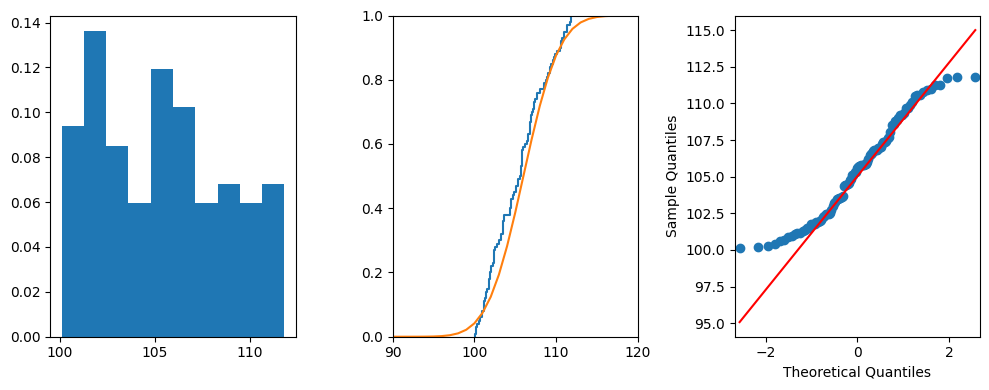

In [580]:
# examples with uniformly distributed data:

n=10 # also try n = 100
data = stats.uniform.rvs(mu, sigma, size=n)
fig, axs = plt.subplots(1, 3, figsize=(10,4))
axs[0].hist(data, density=True)
axs[1].ecdf(data)
axs[1].plot(np.arange(90,120,1), stats.norm.cdf(np.arange(90,120,1), loc=stats.uniform.mean(loc=mu, scale=sigma), scale=stats.uniform.std(loc=mu, scale=sigma)))
axs[1].set_xlim(90,120)
sm.qqplot(data,line="q",a=1/2,ax=axs[2])

plt.tight_layout()
plt.show()

### Example: Voltage drop

[ 0.75 -0.85  4.23  2.12  3.04  0.53 -0.35  1.69  1.52 -0.42]
10


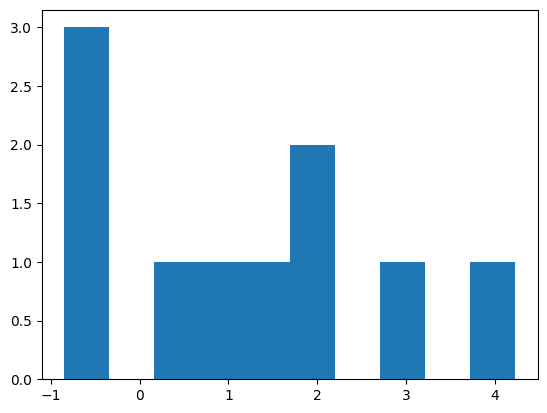

In [597]:
# Enter data
x = np.array([0.75,-0.85,4.23,2.12,3.04,0.53,-0.35,1.69,1.52,-0.42])
n = len(x)
print(x)
print(n)
plt.hist(x)
plt.show()

In [598]:
# Compute best estimate for the mean (and the standard error)
mean_hat = x.mean()
se_mean = x.std(ddof=1)/np.sqrt(n)
print([mean_hat, x.std(ddof=1), se_mean])

[1.226, 1.6203374134214559, 0.5123956804397685]


In [599]:
# confidence interval for the mean:
mu_lower = mean_hat - stats.t.ppf(0.975, df=9)*se_mean
mu_upper = mean_hat + stats.t.ppf(0.975, df=9)*se_mean
print([mu_lower, mu_upper])

[0.06688044133563364, 2.3851195586643663]


In [600]:
# Define the null hypothesis
mean_null_hyp = 0

In [601]:
# Compute the "test statistic" from the oberserved data
tobs = (mean_hat - mean_null_hyp) / se_mean
print(tobs)

2.3926821532682983


In [602]:
# compare with t_0.975 from t-distribution with df = 9
stats.t.ppf(0.975, df=n-1)

2.2621571627409915

In [603]:
2*stats.t.cdf(-tobs, df=n-1)

0.04037944695746914

In [604]:
# You can also use the ttest_1samp funtion from scipy.stats:
print(stats.ttest_1samp(x, popmean=0))

TtestResult(statistic=2.3926821532682974, pvalue=0.04037944695746921, df=9)


### Example: Difference in calorie-intake

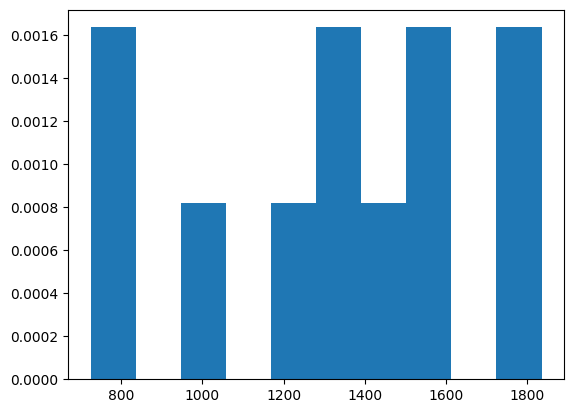

In [612]:
# Plot histogram of data
x = np.array([1350, 1250, 1755, 1020, 745, 1835, 1540, 1540, 725, 1330, 1435])
plt.hist(x, density=True)
plt.show()

How well does the data actually follow a normal distribution? <br>

How well can we expect 11 obervations to "look" like a normal distribution?

In [613]:
# calculate mean and SEM
xbar = x.mean()
n = 11
SEM = x.std(ddof=1)/np.sqrt(n)
print(xbar, SEM)

1320.4545454545455 110.57793332687574


In [607]:
# calculate t_obs
t_obs = (xbar-0)/SEM
print(t_obs)

11.941392877647603


We can already now see that t_obs is very large

In [608]:
# calculate p-value
pval = 2*stats.t.cdf(-t_obs,df=n-1)
print(pval)

3.059020942934875e-07


p-value is smaller than 0.05 (and also smaller than 0.001).
So we reject the nulhypothesis 

In [611]:
# we could also calculate the 95% conficence interval for the mean
mu_lower = xbar - stats.t.ppf(0.975,df=n-1)*SEM
mu_upper = xbar + stats.t.ppf(0.975,df=n-1)*SEM
print([mu_lower, mu_upper])

[1074.0715560389451, 1566.8375348701459]


Notice the confidence interval does not include the value 0

In [614]:
# You can also use the ttest_1samp funtion from scipy.stats:
print(stats.ttest_1samp(x, popmean=0))

TtestResult(statistic=11.941392877647603, pvalue=3.059020942934875e-07, df=10)
